# Compare ours and DNN

Owner: kudkudak (do not change on github if you are not kudkudak)

Compares on subsets converged models:
    
* MaxSim++
* ArgSim
* MaxSim
* DNN with OMCS embeddings (random and normal split)
* DNN with Glove embeddings

In [2]:
import pandas as pd
import os
import matplotlib.pylab as plt
import json
import tqdm
import cPickle
import numpy as np
import seaborn as sns
%matplotlib inline

In [21]:
# This contains codes and data downloaded from http://ttic.uchicago.edu/~kgimpel/commonsense.html
ACL_ROOT_PATH = "/u/jastrzes/l2lwe/ACL_CKBC/"
RESULTS_DIR = "/data/lisa/exp/jastrzes/l2lwe/results/" 
ARGSIM_RESULTS_DIR = os.path.join(RESULTS_DIR, "ArgSim")
MAXSIM_RESULTS_DIR = os.path.join(RESULTS_DIR, "MaxSim")
ACL_DNN_CE_RESULTS_DIR = os.path.join(RESULTS_DIR, "ACL_DNN_CE")

In [22]:
import sys
sys.path.append(os.path.join(ACL_ROOT_PATH, "dnn_ce"))
from utils import getWordmap

In [23]:
train100 = pd.read_csv(os.path.join(ACL_ROOT_PATH, "commonsendata/Training/new_omcs100.txt"), sep="\t", header=None)
train = train100
test = pd.read_csv(os.path.join(ACL_ROOT_PATH, "commonsendata/Eval/conceptnet/new_omcs_test.txt"), sep="\t", header=None)
dev2 = pd.read_csv(os.path.join(ACL_ROOT_PATH, "commonsendata/Eval/conceptnet/new_omcs_dev2.txt"), sep="\t", header=None)
dev2.columns = ['rel', 'head', 'tail', 'score']
train100.columns = ['rel', 'head', 'tail', 'score']
test.columns = ['rel', 'head', 'tail', 'score']

In [24]:
dev2.tail()

,rel,head,tail,score
1195,HasPrerequisite,go jog,person,0
1196,HasPrerequisite,wall,build,0
1197,HasPrerequisite,carpet,go to school,0
1198,CapableOf,light match,start fire,0
1199,CapableOf,beer,cry loudly,0


In [25]:
train100.head()

,rel,head,tail,score
0,ReceivesAction,hockey,play on ice,3.459432
1,AtLocation,restroom,rest area,3.459432
2,HasPrerequisite,eat breakfast,make breakfast,3.459432
3,AtLocation,book,table,3.459432
4,AtLocation,dust,refrigerator,3.459432


In [29]:
def parse_results(run_name, df=test, split="test"):
    df = df.copy() # We will modify it
    eval_results = json.load(open(run_name + ".json"))
    preds = np.array(eval_results['scores_' + str(split)]) >= eval_results['threshold']
    if len(preds) == len(df) + 2:
        # Last two are manually aded. Original code is really messy...
        preds = preds[:-2]   
    df['pred'] = preds
    df['correct'] = df['pred'] == df['score']
    print "Mean acc", df['correct'].mean()
    a1 = df.groupby("rel").count()['correct']
    a2 = df.groupby("rel").mean()['correct'].to_frame()
    a2['cnt'] = a1
    print a2.sort_values("correct")
    return a2, eval_results

In [27]:
# Get few runs

## DNN+CE
random_split = os.path.join(ACL_DNN_CE_RESULTS_DIR, "random_DNN_CEtrainSize100dSize200relSize200\
actirectify.Epoch30.Frac1.0.Actrectify.Batch400.LC5e-05.eta0.005relSize200")

normal_split = os.path.join(ACL_DNN_CE_RESULTS_DIR,"normal_DNN_CEtrainSize100dSize200relSize200actirectify.Epoch30.Frac1.0\
.Actrectify.Batch400.LC5e-05.eta0.005relSize200")

normal_split_glove = os.path.join(ACL_DNN_CE_RESULTS_DIR,"commonsendata_embeddings_glove200_norm.txt_DNN_CEtrainSize100dSize200relSize200actirectify.Epoch30.Frac1.0\
.Actrectify.Batch400.LC5e-05.eta0.005relSize200")

## Print ACL model preds normal vs random split

In [30]:
random_split_tst, random_split_eval = parse_results(random_split + ".txt_eval")

Mean acc 0.842083333333
                   correct  cnt
rel                            
CausesDesire      0.666667    6
RelatedTo         0.666667    3
NotHasProperty    0.750000    4
Causes            0.784946   93
CreatedBy         0.800000    5
NotCapableOf      0.800000   20
MotivatedByGoal   0.800000   15
PartOf            0.807692   52
ReceivesAction    0.818182   22
CapableOf         0.821429  280
MadeOf            0.821429   28
HasPrerequisite   0.823009  226
AtLocation        0.828810  479
HasA              0.857143   98
HasSubevent       0.858824  170
HasProperty       0.860140  143
IsA               0.863636  396
UsedFor           0.873156  339
Desires           0.941176   17
HasFirstSubevent  1.000000    1
NotIsA            1.000000    1
DefinedAs         1.000000    2


In [31]:
normal_split_tst, normal_split_eval = parse_results(normal_split + ".txt_eval")

Mean acc 0.913333333333
                   correct  cnt
rel                            
RelatedTo         0.666667    3
NotHasProperty    0.750000    4
CreatedBy         0.800000    5
NotCapableOf      0.800000   20
ReceivesAction    0.863636   22
Desires           0.882353   17
PartOf            0.884615   52
CapableOf         0.896429  280
HasA              0.897959   98
HasSubevent       0.905882  170
AtLocation        0.906054  479
Causes            0.913978   93
HasPrerequisite   0.915929  226
HasProperty       0.916084  143
IsA               0.926768  396
MotivatedByGoal   0.933333   15
UsedFor           0.941003  339
MadeOf            0.964286   28
HasFirstSubevent  1.000000    1
NotIsA            1.000000    1
DefinedAs         1.000000    2
CausesDesire      1.000000    6


In [32]:
normal_split_glove_tst, normal_split_glove_eval = parse_results(normal_split_glove + ".txt_eval")

Mean acc 0.83875
                   correct  cnt
rel                            
CreatedBy         0.400000    5
PartOf            0.692308   52
ReceivesAction    0.727273   22
NotHasProperty    0.750000    4
Desires           0.764706   17
CapableOf         0.796429  280
Causes            0.817204   93
AtLocation        0.820459  479
MadeOf            0.821429   28
HasPrerequisite   0.836283  226
IsA               0.851010  396
UsedFor           0.852507  339
HasA              0.877551   98
NotCapableOf      0.900000   20
HasSubevent       0.900000  170
HasProperty       0.902098  143
MotivatedByGoal   0.933333   15
RelatedTo         1.000000    3
HasFirstSubevent  1.000000    1
NotIsA            1.000000    1
DefinedAs         1.000000    2
CausesDesire      1.000000    6


## Load MaxSim on different embeddings

81.3% for OMCS (no using rel!), 80.3% for Glove (no using rel!)

In [33]:
maxsim_OMCS = os.path.join(MAXSIM_RESULTS_DIR,"maxsim_OMCS")
maxsim_glove = os.path.join(MAXSIM_RESULTS_DIR, "maxsim_glove")


maxsim_glove_tst, maxsim_glove_eval = parse_results(maxsim_glove)
maxsim_OMCS_tst, maxsim_OMCS_eval = parse_results(maxsim_OMCS)

maxsim_OMCS_tst.columns = ['correct OMCS', 'cnt OMCS']
maxsim_glove_tst.columns = ['correct glove', 'cnt glove']

Mean acc 0.803333333333
                   correct  cnt
rel                            
NotIsA            0.000000    1
HasFirstSubevent  0.000000    1
CausesDesire      0.333333    6
HasPrerequisite   0.606195  226
HasSubevent       0.700000  170
MotivatedByGoal   0.733333   15
Causes            0.763441   93
CapableOf         0.767857  280
NotCapableOf      0.800000   20
ReceivesAction    0.818182   22
UsedFor           0.820059  339
Desires           0.823529   17
HasProperty       0.839161  143
AtLocation        0.845511  479
PartOf            0.865385   52
HasA              0.877551   98
IsA               0.886364  396
MadeOf            0.928571   28
RelatedTo         1.000000    3
NotHasProperty    1.000000    4
DefinedAs         1.000000    2
CreatedBy         1.000000    5
Mean acc 0.813333333333
                   correct  cnt
rel                            
HasFirstSubevent  0.000000    1
CausesDesire      0.500000    6
HasPrerequisite   0.632743  226
HasSubevent       0.7294

## Side by side comparison

In [34]:
def featurize(embedding_path):
    """
    Featurizes train and dev2 (from global namespace) and returns them to you.
    
    Params
    ------
    embedding_path: str
        Path to embeddings to use (Glove format, also used by ACL paper)
    """
    
    print("Reading")
    
    if embedding_path.endswith("txt"):
        print("Guessing it is MaxSim model")
        (words, We) = getWordmap(embedding_path)
        V_rel = list(set(test['rel'].values)) + ['random']
        We_rel = {v: np.random.uniform(-0.1, 0.1, size=We[0].shape) for v in V_rel}
        for v in We_rel:
            We_rel[v] = We_rel[v]/np.linalg.norm(We_rel[v]) * np.linalg.norm(We[0])
        
        def featurize_triplet(v):
             return np.concatenate([np.array([We[words.get(w,0)] for w in v[1].split()]).mean(axis=0), 
                                   We_rel.get(v[0], We_rel['random']).reshape(1, -1),
                                   np.array([We[words.get(w,0)] for w in v[2].split()]).mean(axis=0)]).reshape(-1,)
    elif embedding_path.endswith("pickle"):
        print("Guessing it is from DNN")
        (words, We) = getWordmap('../ACL_CKBC/commonsendata/embeddings.txt')
        z = cPickle.load(open(embedding_path))
        rel_list = list(open("../ACL_CKBC/commonsendata/Training/rel.txt").read().split("\n"))
        We = z['embeddings'] 
        
        V_rel = rel_list
        We_rel = {v: z['rel'][rel_list.index(v.lower())] for v in V_rel}
        for v in We_rel:
            We_rel[v] = We_rel[v]/np.linalg.norm(We_rel[v]) * np.linalg.norm(We[0])
        
        def featurize_triplet(v):
             return np.concatenate([np.array([We[words.get(w,0)] for w in v[1].split()]).mean(axis=0, keepdims=True), 
                                   We_rel.get(v[0].lower(),None).reshape(1, -1),
                                   np.array([We[words.get(w,0)] for w in v[2].split()]).mean(axis=0, keepdims=True)], axis=1).reshape(-1,)

    
    We = We / (1e-4 + np.linalg.norm(We, axis=1, keepdims=True))


    def featurize_df(df):
        feat = np.zeros(shape=(len(df), 3*We.shape[1]))
        for row_id, row in tqdm.tqdm(enumerate(df.values), total=len(df)):
            feat[row_id] = featurize_triplet(row)
        return feat

    train_feat = featurize_df(train)
    dev2_feat = featurize_df(dev2)

    return {"train_feat": train_feat,"dev2_feat": dev2_feat}

In [23]:
# Featurize datasets, will be useful.

## Glove embeddings I constructed in separate script
## These embeddings *are not* shipped with the ACL code
maxsim_glove_feat = featurize(os.path.join(ACL_ROOT_PATH, "commonsendata/embeddings_glove_norm.txt"))

Reading
Guessing it is MaxSim model


100%|██████████| 1200/1200 [00:00<00:00, 17701.22it/s]


In [24]:
normal_split_glove_feat = featurize(normal_split_glove + ".txt30.pickle") 

Reading
Guessing it is from DNN


100%|██████████| 1200/1200 [00:00<00:00, 31288.32it/s]


In [25]:
maxsim_glove_feat = featurize(os.path.join(ACL_ROOT_PATH, "commonsendata/embeddings_glove200_norm.txt"))

Reading
Guessing it is MaxSim model


100%|██████████| 1200/1200 [00:00<00:00, 17319.25it/s]


In [26]:
## These embeddings *are* shipped with ACL code
maxsim_OMCS_feat = featurize(os.path.join(ACL_ROOT_PATH, "commonsendata/embeddings.txt"))
normal_split_feat = featurize(normal_split + ".txt30.pickle")

Reading
Guessing it is MaxSim model


100%|██████████| 1200/1200 [00:00<00:00, 17763.32it/s]


Reading
Guessing it is from DNN


100%|██████████| 1200/1200 [00:00<00:00, 31456.49it/s]


In [27]:
# All models we have for pairwise comparison
MODELS = {
    "maxsim_OMCS": {"eval": maxsim_OMCS_eval, "feat": maxsim_OMCS_feat},
    "maxsim_glove": {"eval": maxsim_glove_eval,"feat": maxsim_glove_feat},
    "dnn": {"eval": normal_split_eval, "feat": normal_split_feat},
    "dnn_glove": {"eval": normal_split_glove_eval, "feat": normal_split_glove_feat}
}

In [28]:
# Construct dataframe containing all information useful for our analysis
# Takes like 3m
data = []
for id in tqdm.tqdm(range(len(dev2)), total=len(dev2)):  
    data.append({"rel": dev2['rel'][id], 
                 "head": dev2['head'][id], 
                 "tail": dev2['tail'][id], 
                 "weight": dev2['score'][id]})
    for model in MODELS:
        dim = MODELS[model]['feat']['dev2_feat'].shape[1]/3
        head = MODELS[model]['feat']['dev2_feat'][id, 0:dim]
        tail = MODELS[model]['feat']['dev2_feat'][id, -dim:]
        data[-1][model + "_argsim_score"] = head.dot(tail.T)
        data[-1][model + "_pred"] = MODELS[model]['eval']['scores_dev2'][id] > MODELS[model]['eval']['threshold']
        data[-1][model + "_score"] = MODELS[model]['eval']['scores_dev2'][id]
        data[-1][model + "_closest"] = str(train.values[MODELS[model]['feat']['train_feat']\
            .dot(MODELS[model]['feat']['dev2_feat'][id,:].T).argmax()])
data = pd.DataFrame(data)

## Few things specific to models we use
data['dnn_glove_score_norm'] = (data['dnn_glove_score'] - data['dnn_glove_score'].mean())/ data['dnn_glove_score'].std()
data['dnn_score_norm'] = (data['dnn_score'] - data['dnn_score'].mean())/ data['dnn_score'].std()
data['maxsim_OMCS_score_norm'] = (data['maxsim_OMCS_score'] - data['maxsim_OMCS_score'].mean())/ data['maxsim_OMCS_score'].std()

100%|██████████| 1200/1200 [04:05<00:00,  4.41it/s]


### Is ArgSim helpful?

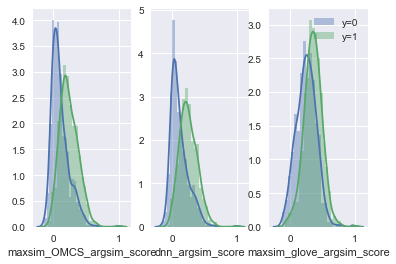

In [37]:
f, ax = plt.subplots(1,3)

sns.distplot(data.query("weight==0")["dnn_argsim_score"], ax=ax[1], label="y=0")
sns.distplot(data.query("weight==1")["dnn_argsim_score"], ax=ax[1], label="y=1")
sns.distplot(data.query("weight==0")["maxsim_OMCS_argsim_score"], ax=ax[0], label="y=0")
sns.distplot(data.query("weight==1")["maxsim_OMCS_argsim_score"], ax=ax[0], label="y=1")
sns.distplot(data.query("weight==0")["maxsim_glove_argsim_score"], ax=ax[2], label="y=0")
sns.distplot(data.query("weight==1")["maxsim_glove_argsim_score"], ax=ax[2], label="y=1")

plt.legend()

### Does DNN use argsim?

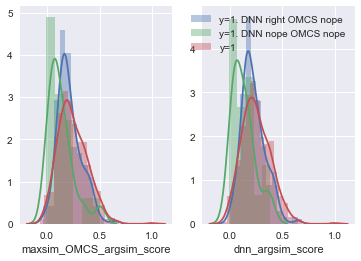

In [38]:
f, ax = plt.subplots(1,2)
sns.distplot(data.query("weight==1 and dnn_pred==1 and maxsim_OMCS_pred==0")["dnn_argsim_score"], ax=ax[1], label="y=1. DNN right OMCS nope")
sns.distplot(data.query("weight==1 and dnn_pred==0 and maxsim_OMCS_pred==0")["dnn_argsim_score"], ax=ax[1], label="y=1. DNN nope OMCS nope")
sns.distplot(data.query("weight==1")["dnn_argsim_score"], ax=ax[1], label="y=1")

sns.distplot(data.query("weight==1 and dnn_pred==1 and maxsim_OMCS_pred==0")["maxsim_OMCS_argsim_score"], ax=ax[0], label="y=1. DNN right OMCS nope")
sns.distplot(data.query("weight==1 and dnn_pred==0 and maxsim_OMCS_pred==0")["maxsim_OMCS_argsim_score"], ax=ax[0], label="y=1. DNN nope OMCS nope")
sns.distplot(data.query("weight==1")["maxsim_OMCS_argsim_score"], ax=ax[0], label="y=1")

plt.legend()

### Is it true models are differentially good for different relations?

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [40]:
data['maxsim_OMCS_closest_rel_agree'] = [ data['rel'][id] in data['maxsim_OMCS_closest'].iloc[id] for id in range(len(data))]

data['maxsim_OMCS_correct']= data['maxsim_OMCS_pred'] ==data['weight']

data['argsim_correct'] = LogisticRegressionCV().fit(data['maxsim_OMCS_argsim_score'].values.reshape(-1,1), data['weight'].values.reshape(-1,1)).predict(data['maxsim_OMCS_argsim_score'].values.reshape(-1,1)) == data['weight']

data['dnn_correct']= data['dnn_pred'] ==data['weight']

/u/jastrzes/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
data.groupby("rel").mean()[['argsim_correct','maxsim_OMCS_correct', \
    'dnn_correct', 'maxsim_OMCS_closest_rel_agree']]

,argsim_correct,maxsim_OMCS_correct,dnn_correct,maxsim_OMCS_closest_rel_agree
rel,,,,
AtLocation,0.762712,0.841808,0.943503,0.627119
CapableOf,0.622517,0.814570,0.860927,0.364238
Causes,0.673077,0.673077,0.942308,0.307692
CausesDesire,0.727273,0.727273,0.772727,0.363636
CreatedBy,1.000000,1.000000,1.000000,0.000000
DefinedAs,0.750000,0.750000,1.000000,0.250000
Desires,0.500000,0.875000,0.833333,0.291667
HasA,0.735294,0.882353,0.882353,0.323529
HasFirstSubevent,1.000000,1.000000,1.000000,0.000000


### topK analysis

Anything to get from top misclassifications?

In [42]:
data['dif'] = data['dnn_score_norm'] - data['maxsim_OMCS_score_norm']
top10bestDNN_pos = data.query("weight==1").sort_values("dif").iloc[-10:]
top10bestDNN_pos.name = "top10bestDNN_pos"
top10bestDNN_neg = data.query("weight==0").sort_values("dif").iloc[0:10]
top10bestDNN_neg.name = "top10bestDNN_neg"
top10bestMax_pos = data.query("weight==1").sort_values("dif").iloc[0:10]
top10bestMax_pos.name= "top10bestMax_pos"
top10bestMax_neg = data.query("weight==0").sort_values("dif").iloc[-10:]
top10bestMax_neg.name = "top10bestMax_neg"
tmp_df = pd.concat([top10bestDNN_pos, top10bestDNN_neg, top10bestMax_pos, top10bestMax_neg])
for ddf in [top10bestDNN_pos, top10bestDNN_neg, top10bestMax_pos, top10bestMax_neg]:
    cols = ['dnn_closest', 'maxsim_OMCS_closest', 'maxsim_glove_closest', 'head', 'rel', 'tail', 'weight', 'dnn_glove_score', 'dnn_score_norm', 'maxsim_OMCS_score_norm']
    print(cols)
    print(ddf.name)
    print("=====")
    ddf = ddf[cols]
    for id in range(len(ddf)):
        print ddf.iloc[id].values
        
    print("--------\n\n\n\n")


['dnn_closest', 'maxsim_OMCS_closest', 'maxsim_glove_closest', 'head', 'rel', 'tail', 'weight', 'dnn_glove_score', 'dnn_score_norm', 'maxsim_OMCS_score_norm']
top10bestDNN_pos
=====
["['HasProperty' 'end of see' 'straight' 1.5849625007211563]"
 "['HasProperty' 'end of see' 'straight' 1.5849625007211563]"
 "['HasProperty' 'end of see' 'straight' 1.5849625007211563]"
 'short distance between two point' 'IsA' 'straight line' 1
 0.45215597413837061 0.56627895765421155 -1.9117544938176758]
["['AtLocation' 'something' 'someone' 2.0]"
 "['CapableOf' 'someone' 'hug someone' 2.3219280948873617]"
 "['AtLocation' 'something' 'someone' 2.0]" 'agree with someone'
 'HasSubevent' 'someone nod' 1 0.67686902475545985 1.2127867836243633
 -1.2908345900466116]
["['HasSubevent' 'agree with someone' 'nod your head' 3.1699250014423126]"
 "['HasSubevent' 'agree with someone' 'nod your head' 3.1699250014423126]"
 "['CapableOf' 'someone' 'give head' 2.807354922057604]"
 'agree with someone' 'HasSubevent' 'nod o